In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=e6c2590ffaff27b829b1440171852239f6cd7ebb3cda616c57cee6f774c0f4c0
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn
from sklearn.metrics import classification_report

# 1) 가상데이터 생성 및 확인

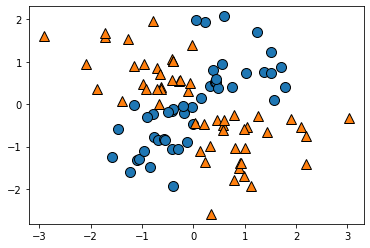

In [ ]:
# make_classification과 같이 가상데이터를 생성하는 함수가 아니라 numpy를 활용하여도 간단한 가상데이터를 생성할 수 있다.
# 200개의 데이터, feature = 2개인 비선형 데이터를 생성해보자
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state = 0)

# 2) 모델링

단일 퍼센트론 모델을 생성하여 위의 가상데이터를 분류할 수 있는지 알아보자.

MLPClassifier  

* 주요 parameter:
 - `hidden_layer_sizes` : 개별 hidden layer의 뉴런의 개수로 튜플 or 리스트형태로 입력한다, 기본값은 (100,)
 - `activation` : 활성화 함수, 기본값은 'relu'
        가중합의 값을 판단하는 함수로 'identitiy', 'logistic', 'tanh'(sigmoid의 일종), 'relu' 가 있다.
 - `solver` : 최적화 알고리즘, 기본값은 'adam'
        가중치를 최적화하기 위한 알고리즘의 종류이며 'lbfgs', 'sgd'(stochastic(확률적) gradient descent), 'adam'이 있다.
 - `alpha` : L2 규제화 규제 정도 (Ridge regression과 동일), 기본값은 0.0001
 - `tol` : 학습을 종료하는 cost값, 기본값은 0.0001
 - `max_iter` : optimizing 최대 반복 횟수


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

# hidden_layer_sizes를 빈 튜플로 지정하여 단일 퍼셉트론 모델을 생성할 수 있다.
model_pctr = MLPClassifier(hidden_layer_sizes=(), random_state = 0)

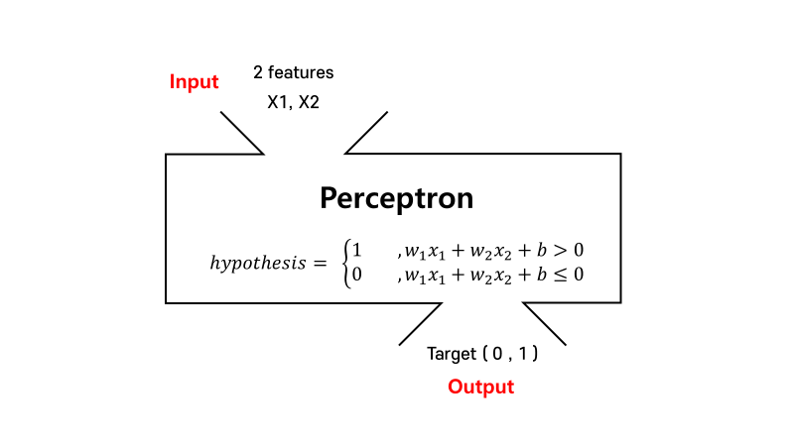

In [ ]:
model_pctr.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

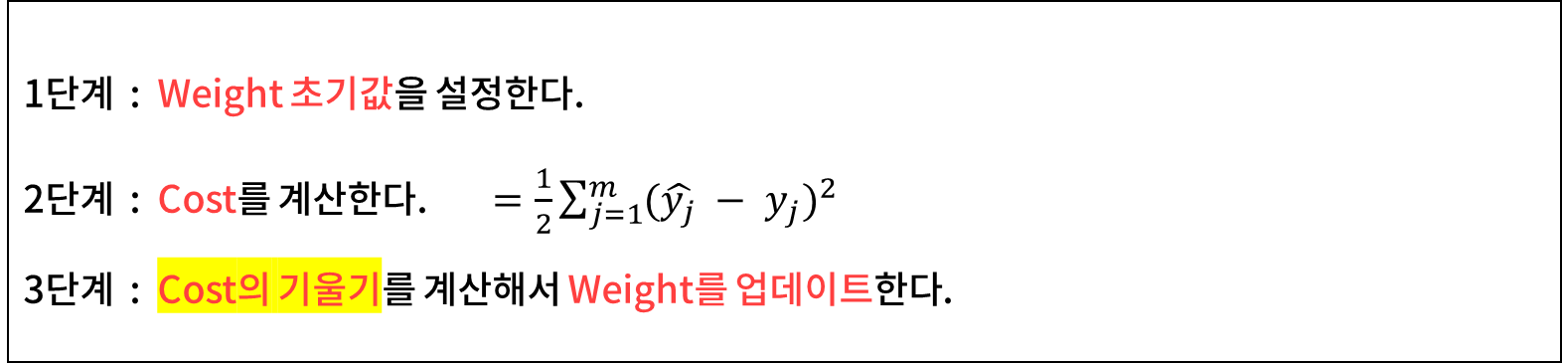

# 3) 학습된 모델 확인 및 평가

In [ ]:
# X1, X2에 대한 coef W1, W2를 확인해보자
model_pctr.coefs_

[array([[0.06524257],
        [0.4957001 ]])]

In [ ]:
# bias를 확인해보자
model_pctr.intercepts_

[array([0.21131921])]

In [ ]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 1)


In [ ]:
print('train score : {:.3f}'.format(model_pctr.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_pctr.score(X_test, y_test)))

pred_pctr = model_pctr.predict(X_test)
print('분류 report:\n', classification_report(y_test, pred_pctr))

train score : 0.550
test score : 0.450
분류 report:
               precision    recall  f1-score   support

          -1       0.29      0.25      0.27         8
           1       0.54      0.58      0.56        12

    accuracy                           0.45        20
   macro avg       0.41      0.42      0.41        20
weighted avg       0.44      0.45      0.44        20



단일 퍼셉트론 모델로는 train 데이터와 test 데이터 모두 제대로 분류하지 못했다.

In [ ]:
# 학습된 모델이 데이터를 어떻게 분류하고 있는지 그래프로 확인하는 함수
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

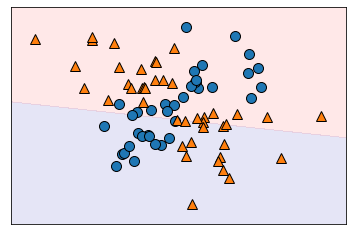

In [ ]:
result_visualization(model_pctr, X_train, y_train)

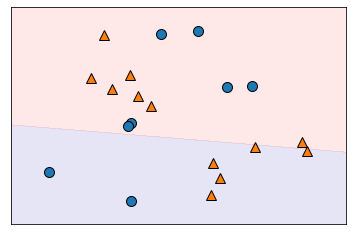

In [ ]:
result_visualization(model_pctr, X_test, y_test)

앞서 생성한 데이터와 같이 선형적으로 분리할 수 없는 데이터는 단일 퍼셉트론 모델로는 정확하게 분류해낼 수 없다.  

# (심화학습) Perceptron pseudo code



```
class SVC(object):

    활성화 함수
    def _unit_step_func(x):
        1. 입력된 x가 0 이상인 경우 1, 아닌 경우 0으로 변환
        2. 변환된 값 return
    

    학습 과정
    def fit(X_data, y_data):
        1. target data인 y가 0 이상인 경우 1, 아닌 경우 0로 변환
        2. weight, bias 초기화
        3. 경사하강법을 활용하여 반복 학습
            3-1. weight, bias 활용하여 계산 결과값 도출
            3-2. cost 함수의 기울기 계산
            3-3. 학습률(learning_rate) * 기울기 만큼 weight, bias 업데이트


    예측 과정
    def predict(X_data):
        1. Weight, bias 활용하여 계산 결과값 도출
        2. 활성화 함수를 통해 예측값 도출
        3. 예측값 return

```


참고 : https://www.python-engineer.com/courses/mlfromscratch/06_perceptron/

In [ ]:
import numpy as np


class Perceptron(object):

    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        [hyper_parameter]
        learning_rage: 학습률
        lambda_param: 규제 파리미터(C의 역수)
        n_iter: 반복 학습 횟수
        activation_func: 활성화함수
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None


    def _unit_step_func(self, x):
        # 활성화 함수(0 이상인 경우 1, 아닌 경우 0)
        return np.where(x >= 0, 1, 0)


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # target data인 y가 0 이상인 경우 1, 아닌 경우 0
        y_ = np.array([1 if i > 0 else 0 for i in y])

        # weight, bias 초기화
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 경사하강법을 활용하여 반복 학습
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Weight, bias 활용하여 계산 결과값 도출
                linear_output = np.dot(x_i, self.weights) + self.bias

                # 활성화 함수를 통해 예측값 도출
                y_predicted = self.activation_func(linear_output)

                # cost 함수의 기울기 계산
                grad_weights = (y_[idx] - y_predicted) * x_i
                grad_bias = (y_[idx] - y_predicted)

                # learning_rate * 기울기 만큼 업데이트
                self.weights += self.lr * grad_weights
                self.bias += self.lr * grad_bias


    def predict(self, X):
        # Weight, bias 활용하여 계산 결과값 도출
        linear_output = np.dot(X, self.weights) + self.bias

        # 활성화 함수를 통해 예측값 도출
        y_predicted = self.activation_func(linear_output)

        # 예측값 return
        return y_predicted